### Observable Trends

* 1. The Rural area has the least of amount of riders on average, and the fare prices have a higher and lower price ceiling than urban areas. If you drive in a rural area, it seems that you would not be able to expect a consistant per day income. This would cause the driver to either have an short, or a long day to make their daily goal

* 2. If you drive in Urban environments, there is a lot of competition and prices are lower than suburban areas. this would cause the driver to work longer hours to pick up more riders to make their daily goal. It seems the average price hot spot for an urban environment is around 22 dollars. With no fares reaching the 30 dollar mark. 

* 3. Suburban environments seem to bring in the most consistent price per ride at a hotspot price of around 30-35 dollars. If the driver planned on working the most consistent hours, and bringing home a consistent income per day, then suburban would be the recommended environment to drive in. There is much less competition in this area than urban, and provides a consistent income per ride than rural. 

In [11]:
%matplotlib inline

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

scatter_export = os.path.join("figures", "2018_by_city.png")
fares_export = os.path.join("figures", "2018_fares_by_city.png")
rides_export = os.path.join("figures", "2018_rides_by_city.png")
drivers_export = os.path.join("figures", "2018_drivers_by_city.png")
city_csv = os.path.join("data", "city_data.csv")
ride_csv = os.path.join("data", "ride_data.csv")
city_df = pd.read_csv(city_csv)
ride_df = pd.read_csv(ride_csv)

In [13]:
# Read the Ride Data
# Check out the data and see if errors exist
#ride_df.head()
#ride_df.dtypes
#ride_df.nunique()
#ride_df.describe()
#ride_df.count()
# Read the City Data
#city_df.dtypes
#city_df.nunique()
#city_df.describe()
#city_df.driver_count.count()
#city_df.city.count()
#city_df.type.count()
#city_df.count()
# Drop the bad data
city_df = city_df.drop_duplicates("city", keep="first")
#city_df.head()

In [14]:
# Combine the data into a single dataset
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
df = pd.merge(ride_df, city_df, how='left', on='city')
# Display the data table for preview
df.head()
#df.nunique()
#df.describe()
#df.dtypes
#df.count()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [15]:
#https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
city_group = df.groupby('city')
fare_mean = city_group.mean()['fare']
ride_count = city_group["ride_id"].count()
driver_count = city_group.mean()["driver_count"]
rides = city_group['ride_id'].count()
city_type = city_df.set_index('city')['type']

#Make a new DF with all the new information instead of 4 series
new_df = pd.DataFrame({"Driver Count":driver_count, "Mean Fare":fare_mean, "Ride Count":ride_count,"City Type": city_type})

In [16]:
# Obtain the x and y coordinates for each of the three city types
# Urban
urban_df = new_df[new_df['City Type'] == 'Urban']
# Suburban
suburban_df = new_df[new_df["City Type"] == "Suburban"]
# Rural
rural_df = new_df[new_df["City Type"] == "Rural"]

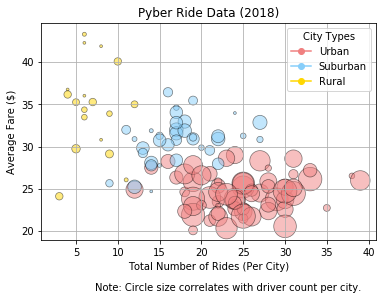

In [17]:
# Build the scatter plots for each city types
plt.scatter(urban_df['Ride Count'], urban_df['Mean Fare'], s=urban_df['Driver Count']*8,
            edgecolor='black', alpha=0.5, color='lightcoral', label='Urban', linewidth=0.7)
plt.scatter(suburban_df["Ride Count"], suburban_df["Mean Fare"], s=suburban_df["Driver Count"]*8, 
            edgecolor='black', alpha=0.5, color="lightskyblue", label="Suburban", linewidth=0.7)
plt.scatter(rural_df["Ride Count"], rural_df["Mean Fare"], s=rural_df["Driver Count"]*8, 
            edgecolor='black', alpha=0.5, color="gold", label="Rural", linewidth=0.7)
# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Data (2018)")
# Incorporate a text label regarding circle size
plt.figtext(0.25, -0.05,
            'Note: Circle size correlates with driver count per city.')
plt.grid(True)
# Create a legend
leg_colors = {'Urban':'lightcoral', 
              'Suburban':'lightskyblue', 
              'Rural':'gold'}
markers = [plt.Line2D([0,0],[0,0],color=color, marker='o') 
           for color in leg_colors.values()]
#https://www.programiz.com/python-programming/methods/dictionary/keys
plt.legend(markers, 
           ["Urban", "Suburban","Rural"], 
           numpoints=1, 
           title='City Types', 
           loc='best')
#width,height because the default box looked bad
plt.rcParams['figure.figsize'] = [7,4]
# Save Figure
plt.savefig(scatter_export)
plt.show()

### Total Fares by City Type (Pie Chart)

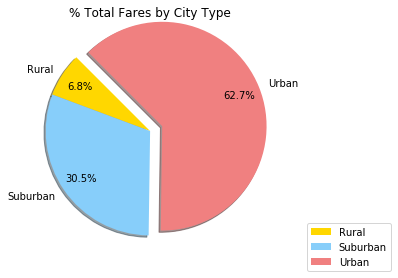

In [18]:
# Calculate Type Percents
total_fares = df.groupby('type')['fare', 'type']
fares_sum = total_fares.sum()['fare']
# Build Pie Chart
explode = (0.0, 0.0, 0.15)
colors = ['gold', 'lightskyblue', 'lightcoral']
labels = ['Rural', 'Suburban', 'Urban']
plt.pie(fares_sum,
        explode=explode,
        labels=labels,
        colors=colors,
        radius=1.2,
        autopct="%1.1f%%",
        shadow=True,
        pctdistance=0.8,
        rotatelabels=False,
        wedgeprops = {'linewidth': 1},
        startangle=135)
plt.title("% Total Fares by City Type")
plt.legend(bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure, loc='lower right')
# Save Figure
plt.savefig(fares_export)
plt.show()

### Total Rides by City Type (Pie Chart)

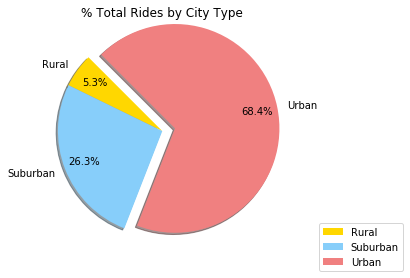

In [19]:
# Calculate Ride Percents
total_rides = df.groupby("type")["ride_id"]
rides = total_rides.count()
# Build Pie Chart
plt.pie(rides,
        explode=explode,
        labels=labels,
        colors=colors,
        radius=1.2,
        autopct="%1.1f%%",
        shadow=True,
        pctdistance=0.8,
        rotatelabels=False,
        wedgeprops = {'linewidth': 1},
        startangle=135)
plt.title("% Total Rides by City Type")
plt.legend(bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure, loc='lower right')
# Save Figure
plt.savefig(rides_export)
plt.show()

### Total Drivers Per City Type (Pie Chart)

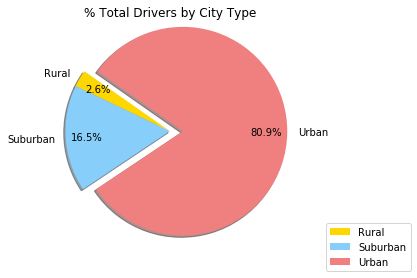

In [10]:
# Calculate Driver Percents
driver_type = df.drop_duplicates("city", keep="first")
drivers_type = driver_type.groupby("type")
drivers = drivers_type.sum()["driver_count"]
# Build Pie Charts
plt.pie(drivers,
        explode=explode,
        labels=labels,
        colors=colors,
        radius=1.2,
        autopct="%1.1f%%",
        shadow=True,
        pctdistance=0.8,
        rotatelabels=False,
        wedgeprops = {'linewidth': 1},
        startangle=145)
plt.title("% Total Drivers by City Type")
plt.legend(bbox_to_anchor=(1,0), bbox_transform=plt.gcf().transFigure, loc='lower right')
# Save Figure
plt.savefig(drivers_export)
plt.show()